In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [18]:
df = pd.read_csv('loan.csv')

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
df.shape

(614, 13)

In [21]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [24]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

imputation

In [29]:
df_cat = df.select_dtypes(include=['object'])
df_num = df.select_dtypes(include=['int64', 'float64'])

In [30]:
df_num.isnull().sum().sort_values(ascending=False)

Credit_History       50
LoanAmount           22
Loan_Amount_Term     14
ApplicantIncome       0
CoapplicantIncome     0
dtype: int64

In [31]:
df_cat.isnull().sum().sort_values(ascending=False)

Self_Employed    32
Dependents       15
Gender           13
Married           3
Loan_ID           0
Education         0
Property_Area     0
Loan_Status       0
dtype: int64

In [32]:
for col in df_num.columns:
    df_num[col].fillna(df_num[col].median(), inplace=True)

C:\Users\D MADHAN MOHAN\AppData\Local\Temp\ipykernel_69124\3485726917.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_num[col].fillna(df_num[col].median(), inplace=True)
C:\Users\D MADHAN MOHAN\AppData\Local\Temp\ipykernel_69124\3485726917.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [33]:
df_num.isnull().sum().sort_values(ascending=False)

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [34]:
for col in df_cat.columns:
    df_cat[col].fillna(df_cat[col].mode()[0], inplace=True)

C:\Users\D MADHAN MOHAN\AppData\Local\Temp\ipykernel_69124\308293397.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cat[col].fillna(df_cat[col].mode()[0], inplace=True)


In [35]:
df_cat.isnull().sum().sort_values(ascending=False)

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

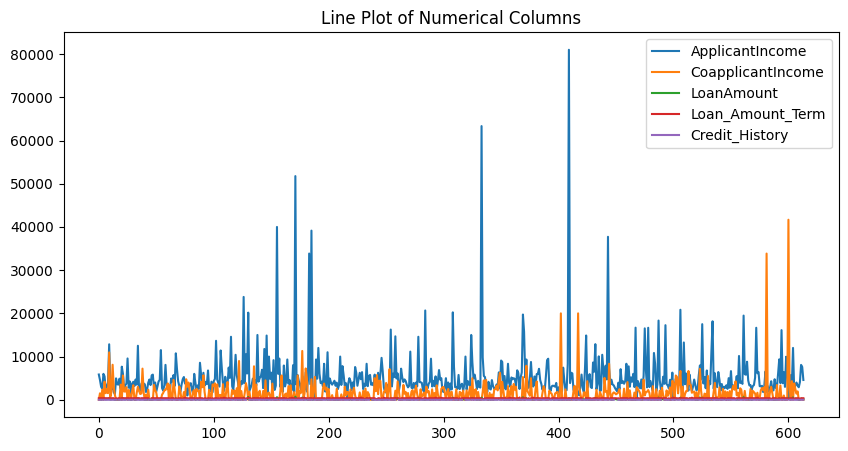

In [37]:
# Visualization 1: Line Plot
plt.figure(figsize=(10, 5))
for col in df_num:
    plt.plot(df[col], label=col)
plt.title('Line Plot of Numerical Columns')
plt.legend()
plt.show()

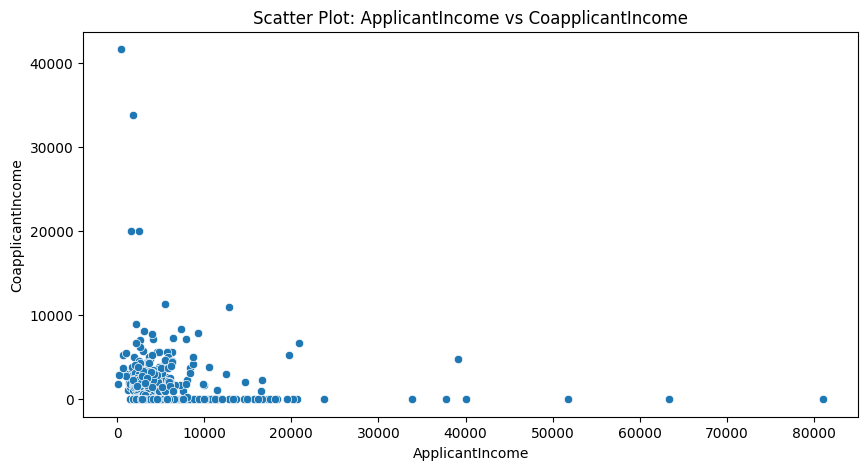

In [39]:
# Visualization 2: Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='ApplicantIncome', y='CoapplicantIncome')
plt.title('Scatter Plot: ApplicantIncome vs CoapplicantIncome')
plt.show()

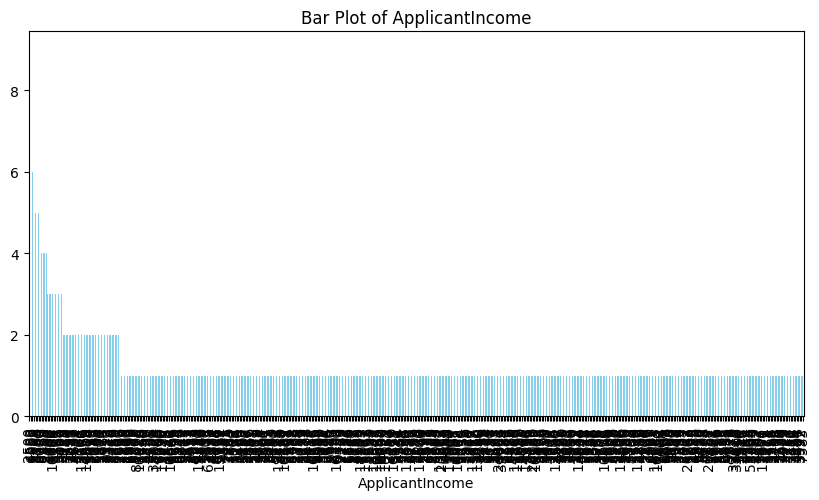

In [41]:
# Visualization 3: Bar Plot
plt.figure(figsize=(10, 5))
df['ApplicantIncome'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Plot of ApplicantIncome')
plt.show()

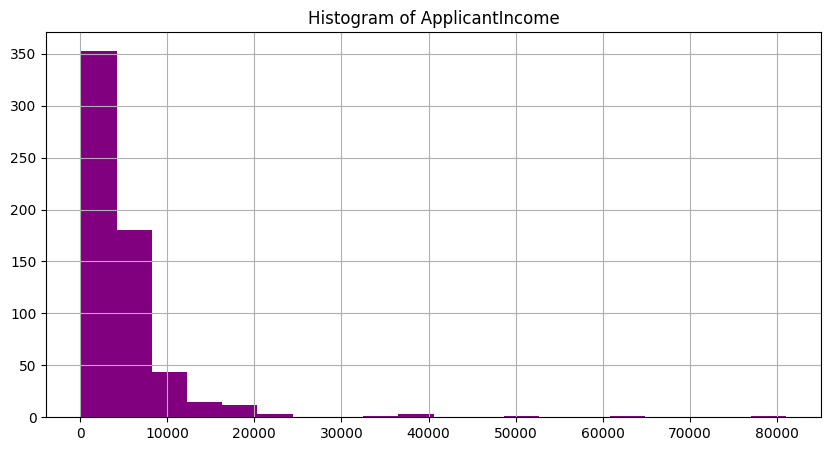

In [43]:
# Visualization 4: Histogram
plt.figure(figsize=(10, 5))
df[df_num.columns[0]].hist(bins=20, color='purple')
plt.title(f'Histogram of {df_num.columns[0]}')
plt.show()

In [44]:
# Visualization 5: Box Plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[df_num])
plt.title('Box Plot of Numerical Columns')
plt.show()

ValueError: Boolean array expected for the condition, not int64

<Figure size 1000x500 with 0 Axes>